In [1]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
data = pd.read_csv('FINALMLDATASET.csv')

In [16]:
#convert the data into dataframe
df = pd.DataFrame(data)
#display the first five rows of the data
df.head()

,PROJECTASSIGNED,SATISFACTION,COMMUNICATION,GOALS,DELIVERABLES,TIMELINESS,CHALLENGES,PROJECTMANAGEMENT,SUPPORT,IMPROVEMENT,...,SAT,SUN,TOTAL,PROJECTNAME,DOMAIN,COMPLEXITY,USER_ID,NAME,ROLE,Target
0,Neal PLC Initiative,NaN,NaN,NaN,4.0,2.0,4.0,NaN,4.0,NaN,...,5,6,43,Neal PLC Initiative,Telecommunications,High,1,Barbara Sanchez,Sr.Developer,NaN
1,Lambert Inc Project,3.0,2.0,2.0,5.0,5.0,2.0,5.0,1.0,NaN,...,9,7,56,Lambert Inc Project,Cybersecurity,Medium,3,Jasmine Preston,Jr.Developer,NaN
2,Lambert Inc Project,4.0,3.0,1.0,4.0,2.0,3.0,3.0,NaN,NaN,...,9,7,56,Lambert Inc Project,Cybersecurity,Medium,3,Jasmine Preston,Jr.Developer,NaN
3,Lambert Inc Project,3.0,2.0,2.0,5.0,5.0,2.0,5.0,1.0,NaN,...,10,9,58,Lambert Inc Project,Cybersecurity,Medium,3,Jasmine Preston,Jr.Developer,NaN
4,Lambert Inc Project,4.0,3.0,1.0,4.0,2.0,3.0,3.0,NaN,NaN,...,10,9,58,Lambert Inc Project,Cybersecurity,Medium,3,Jasmine Preston,Jr.Developer,NaN


In [4]:
df.shape

(19955, 29)

In [5]:
df.nunique()

PROJECTASSIGNED        20
SATISFACTION            5
COMMUNICATION           5
GOALS                   5
DELIVERABLES            5
TIMELINESS              5
CHALLENGES              5
PROJECTMANAGEMENT       5
SUPPORT                 5
IMPROVEMENT            10
DATESTART             105
DATEEND               105
USERID               1008
PROJECTTYPE             3
TASKSELECTED            9
MON                    10
TUE                    10
WED                    10
THU                    10
FRI                    10
SAT                    10
SUN                    10
TOTAL                  58
PROJECTNAME            20
DOMAIN                  9
COMPLEXITY              2
USER_ID              1008
NAME                 1002
ROLE                    5
dtype: int64

<h2>Univariate Analysis<h2/>

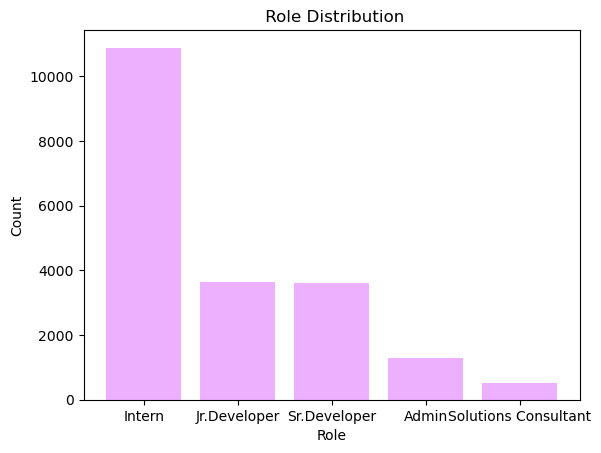

In [6]:
#ROLE DISTRIBUTION AMONG EMPLOYEES
role_counts = df['ROLE'].value_counts()
#define the color palette
colors = ['#EDAFFF']
#create a bar plot
plt.bar(role_counts.index, role_counts.values, color = colors)
#set the title and axis label
plt.xlabel('Role')
plt.ylabel('Count')
plt.title(' Role Distribution')
plt.show()

<h2>Bivariate Analysis=</h2>

AttributeError: 'numpy.int64' object has no attribute 'startswith'

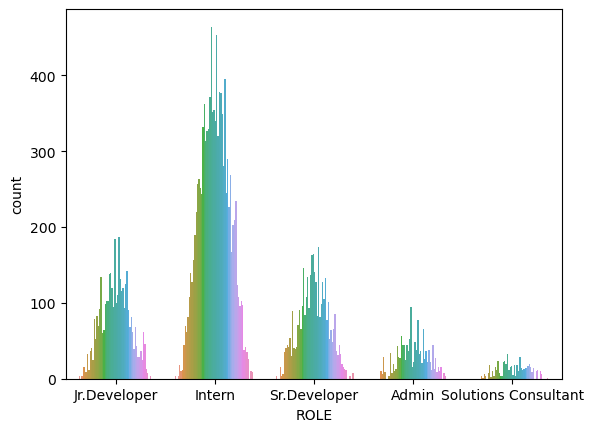

In [7]:
#ROLE relation to the total hours worked by them weekly during projects 
sns.countplot(data=df, x = 'ROLE' , hue = 'TOTAL')

In [ ]:

df

In [8]:
!pip install ydata-profiling

In [11]:
from ydata_profiling import ProfileReport

In [12]:
report = ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\Karthik\anaconda3\Lib\site-packages\ydata_profiling\model\correlations.py:66: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'could not convert string to float: 'High'')
  warnings.warn(
C:\Users\Karthik\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)
C:\Users\Karthik\anaconda3\Lib\site-packages\ydata_profiling\model\missing.py:78: UserWarning: There was an attempt to generate the Heatmap missing values diagrams, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

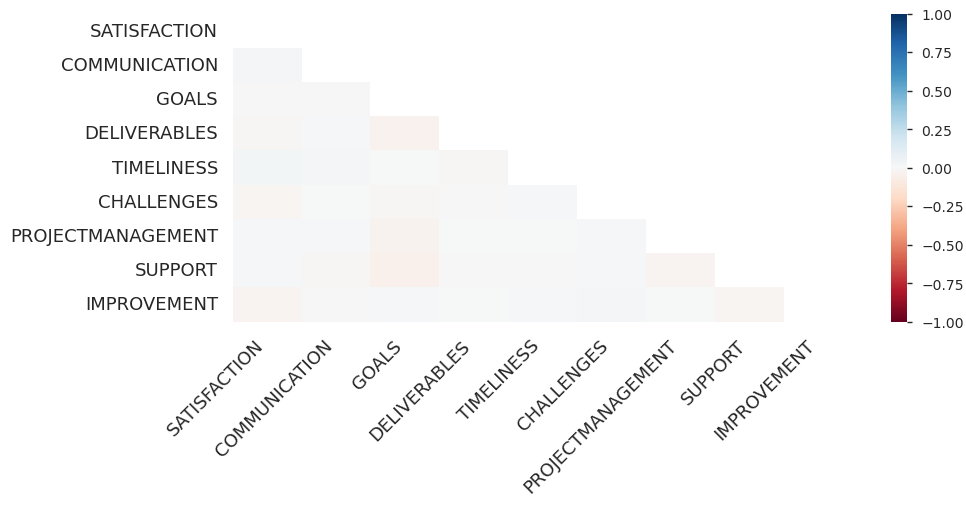

In [13]:
report.to_file('sample.html')

In [17]:
df['Target'] = np.where(df['TOTAL'] < 45, 1, 0)

# Verify the new column
print(data[['TOTAL', 'Target']].head())

# Split the data into features (X) and target variable (y)
X = df[['TOTAL']]  # Features
y = df['Target']    # Target variable

# Split the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


   TOTAL  Target
0     43     NaN
1     56     NaN
2     56     NaN
3     58     NaN
4     58     NaN
Accuracy Score: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3647
           1       1.00      1.00      1.00       344

    accuracy                           1.00      3991
   macro avg       1.00      1.00      1.00      3991
weighted avg       1.00      1.00      1.00      3991

